In [1]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Data collection
data = pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.shape

(768, 9)

In [7]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x17aa4523830>,
 [Text(-0.5025943242672991, 0.9784676515931925, '0'),
  Text(0.5025944158780503, -0.9784676045369114, '1')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.1%'),
  Text(0.2741424086607547, -0.5337096024746789, '34.9%')])

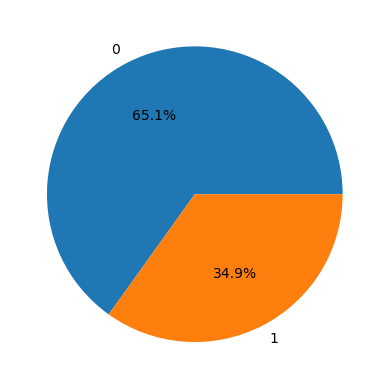

In [8]:
outcome = data.Outcome.value_counts()
plt.pie(labels=outcome.index,x=outcome.values,autopct='%1.1f%%')

In [9]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: >

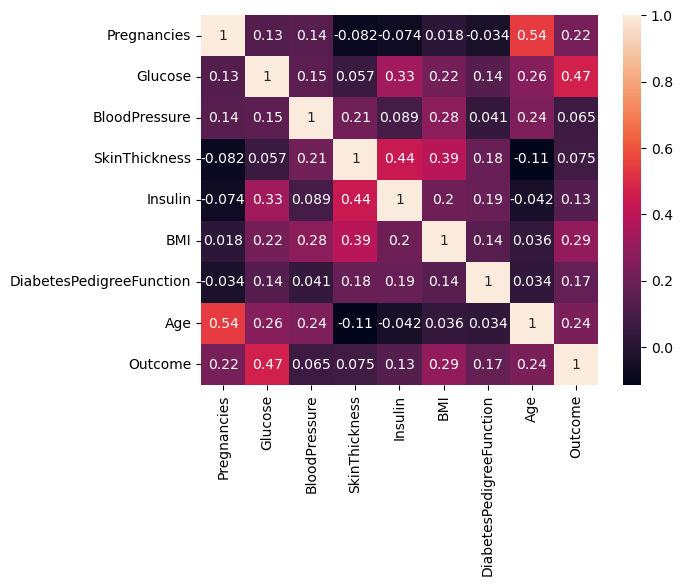

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
X = data.drop(columns=['Outcome'],axis=1)
y = data.Outcome

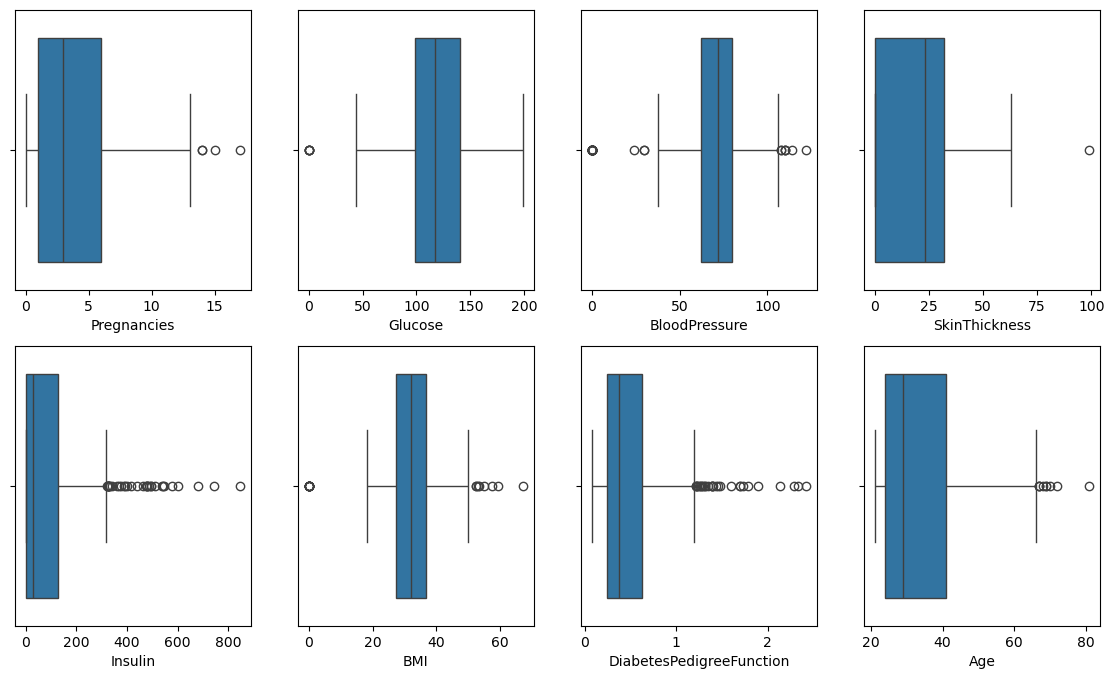

In [12]:
plt.figure(figsize=(14,8))
for index,col in enumerate(iterable=X.columns):
    plt.subplot(2,4,index+1)
    sns.boxplot(x=X[col])

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [17]:
X_train.shape

(537, 8)

In [18]:
X_test.shape

(231, 8)

In [19]:
from sklearn.svm import SVC

svmClassfier = SVC(kernel='linear')
svmClassfier.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
y_pred = svmClassfier.predict(X_test)


In [22]:
confusion_matrix(y_test,y_pred)

array([[123,  28],
       [ 30,  50]], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [24]:
accuracy_score(y_test,y_pred)

0.7489177489177489

In [25]:
accuracy_score(y_train,svmClassfier.predict(X_train))

0.7821229050279329

In [26]:
from sklearn.model_selection import GridSearchCV


In [27]:
params ={
    'C':[0.01,0.1,1.0,10,100,1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape': ['ovo', 'ovr'],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
    
}

In [28]:
cv = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    scoring='accuracy'
)

In [29]:
cv.fit(X_train,y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'decision_function_shape': ['ovo', 'ovr'], 'degree': [1, 3, ...], 'gamma': [0.01, 1], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.0


In [30]:
cv.best_params_

{'C': 1.0,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 0.01,
 'kernel': 'linear'}

In [31]:
cv.best_score_

0.7839217722395293

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [33]:
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gd_boost = GradientBoostingClassifier()

In [34]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM' : SVC()
}

In [35]:
for name,model in models.items():
    print('-'*10+name+'-'*10)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('Training Data')
    print('Accuracy score : ',accuracy_score(y_train,y_train_pred))
    print('Confusion matrix : \n',confusion_matrix(y_train,y_pred=y_train_pred))
    print(classification_report(y_train,y_train_pred))
    print('\nTesting Data')
    print('Accuracy score : ',accuracy_score(y_test,y_pred))
    print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    print('\n\n')


----------Logistic Regression----------
Training Data
Accuracy score :  0.7821229050279329
Confusion matrix : 
 [[311  38]
 [ 79 109]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       349
           1       0.74      0.58      0.65       188

    accuracy                           0.78       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.78      0.77       537


Testing Data
Accuracy score :  0.7359307359307359
Confusion matrix : 
 [[120  31]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231




----------Decision Tree----------
Training Data
Accuracy score :  1.0
Confusion matrix : 
 [[349   0]
 [  0 188]]

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


In [3]:
pipeline = Pipeline(
    [
        ('Scaling',StandardScaler()),
        ('model',SVC())
    ]
)

In [4]:
data = pd.read_csv('diabetes.csv')


In [5]:
pipeline.fit(data.drop(columns='Outcome'),data.Outcome)

,steps,"[('Scaling', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [6]:
import joblib
joblib.dump(pipeline,'diabetes.pkl')

['diabetes.pkl']